In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


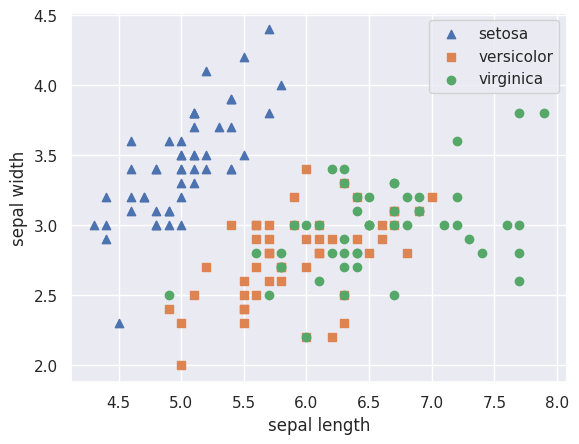

In [7]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target'] == i]['sepal length (cm)']
    y_axis_data = df[df['target'] == i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

Setosa 품종은 sepal width가 3보다 크고, sepal length가 6 이하인 곳에 일정하게 분포  
Versicolor와 virginica의 경우 두 조건만으로는 분류가 어려움  
PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2차원 시각화  
PCA는 여러 속성의 값을 연산해야 하므로 스케일에 영향을 받음  
따라서 여러 속성을 PCA 적용 전 각 속성값을 동일한 스케일로 변환해야 함

In [10]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [12]:
df_pca = pd.DataFrame(iris_pca, columns=['pca_component_1', 'pca_component_2'])
df_pca['target'] = iris.target

df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


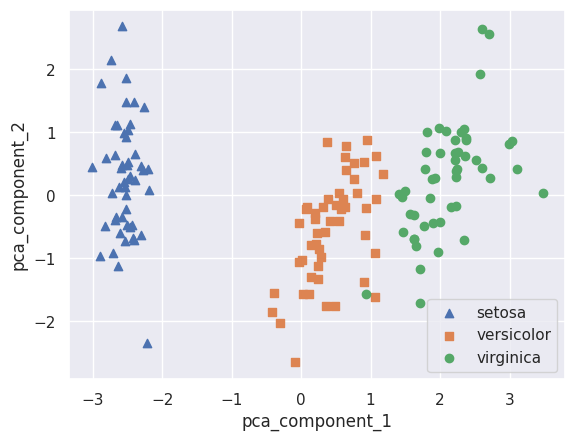

In [14]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target'] == i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [16]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.76740358 0.18282727]
0.9502308529408711


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)

[0.98 0.94 0.96]


In [18]:
pca_X = df_pca.values[:, :-1]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores_pca)

[0.98 0.98 1.  ]
